In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
test = pd.read_csv("au_test.csv")
train = pd.read_csv("au_train.csv")

# Merging the data for EDA
df = test.append(train)

# dimension of the df
print("Data shape: ", df.shape)

# printing the first 5 rows of our dataset
df.head()

Data shape:  (48842, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [4]:
# DATA EXPLORATION

# brief look at the variables
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
# trimming white spaces of all columns with strings
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# coverting "?" to N/A values
df = df.replace('?', np.NaN)

df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [6]:
df.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


There are approximately 45000 rows without any NaN values, i.e. ~7% of the rows with NaN values so we can drop these rows

In [7]:
df = df.dropna()
print("Data shape: ", df.shape)

Data shape:  (45222, 15)


In [8]:
# describing numerical columns
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


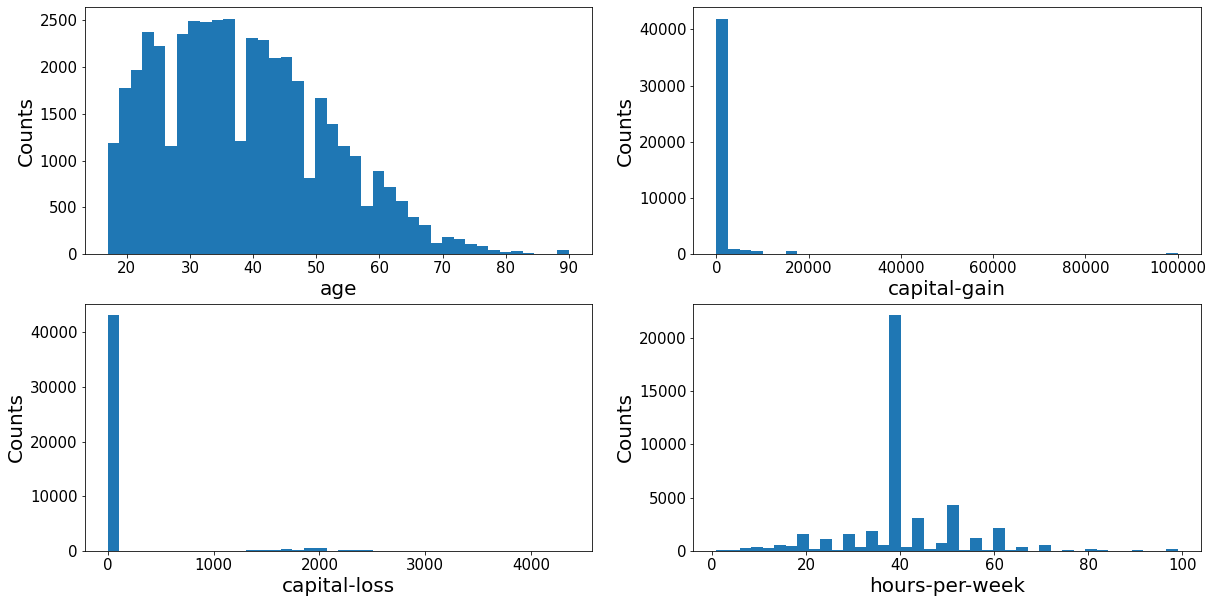

In [10]:
# plotting histogram for numerical values

# import visulization packages
import matplotlib.pyplot as plt

# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

Since, 'capital-gain' and 'capital-loss' variables are extremely skewed, we will remove these from our analysis

In [9]:
# describing categorical columns
df.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,4
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,22654


In [16]:
# Creating frequency tables for categorical columns

print(df['workclass'].value_counts())
print(df['education'].value_counts())
print(df['marital-status'].value_counts())
print(df['occupation'].value_counts())
print(df['relationship'].value_counts())
print(df['race'].value_counts())
print(df['sex'].value_counts())
print(df['native-country'].value_counts())
print(df['class'].value_counts())

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64
Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        480

As we can observe from the frequency table above, there are certain variables which can use merging their variables to reduce complexity of the model while building it.

The variables choosen to merge are 'workclass', and 'marital-status'

While 'country' variable can be ignored because of skewness in the data distribution.

'class' variable also needs to be fixed since there are repeating categories with just different names

In [13]:
# since we have 4 categorical values in 'class', we will fix the typos
df["class"]

df["class"] = df["class"].replace('<=50K.', '<=50K')
df["class"] = df["class"].replace('>50K.', '>50K')

# confirming the fix in class category
print(df['class'].value_counts())

<=50K    34014
>50K     11208
Name: class, dtype: int64


In [20]:
# merging categories in 'workclass'

df['new_workclass'] = df['workclass']
df['new_workclass'].replace({'Local-gov':'Gov','State-gov':'Gov','Federal-gov':'Gov',
                             'Self-emp-not-inc':'Self-emp','Self-emp-inc':'Self-emp'}, inplace=True)
print(df['new_workclass'].value_counts())

Private        33307
Gov             6452
Self-emp        5442
Without-pay       21
Name: new_workclass, dtype: int64


In [21]:
# merging categories in 'occupation'

df['new_marital-status'] = df['marital-status']
df['new_marital-status'].replace({'Married-civ-spouse':'Married','Married-spouse-absent':'Married',
                                  'Married-AF-spouse':'Married'}, inplace=True)
print(df['new_marital-status'].value_counts())

Married          21639
Never-married    14598
Divorced          6297
Separated         1411
Widowed           1277
Name: new_marital-status, dtype: int64


In [22]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,new_workclass,new_marital-status
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,Private,Never-married
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,Private,Married
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,Gov,Married
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,Private,Married
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,Private,Never-married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Private,Married
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,Private,Married
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,Private,Widowed
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,Private,Never-married


In [114]:
df_workclass = df['workclass'].value_counts().rename_axis('Name').reset_index(name='Count')
df_education = df['education'].value_counts().rename_axis('Name').reset_index(name='Count')
df_marital_status = df['marital-status'].value_counts().rename_axis('Name').reset_index(name='Count')
df_occupation = df['occupation'].value_counts().rename_axis('Name').reset_index(name='Count')
df_relationship = df['relationship'].value_counts().rename_axis('Name').reset_index(name='Count')
df_race = df['race'].value_counts().rename_axis('Name').reset_index(name='Count')
df_sex = df['sex'].value_counts().rename_axis('Name').reset_index(name='Count')
df_native_country = df['native-country'].value_counts().rename_axis('Name').reset_index(name='Count')
df_class = df['class'].value_counts().rename_axis('Name').reset_index(name='Count')

"\nplt.rcParams['figure.figsize'] = (20, 10)\n\n# make subplots\nfig, axes = plt.subplots(nrows = 3, ncols = 3)\n\n# Specify the features of interest\nnum_features = ['workclass', 'capital-gain', 'capital-loss', 'hours-per-week']\nxaxes = num_features\nyaxes = ['Counts', 'Counts', 'Counts', 'Counts']\n\n# draw histograms\naxes = axes.ravel()\nfor idx, ax in enumerate(axes):\n    ax.hist(df[num_features[idx]].dropna(), bins=40)\n    ax.set_xlabel(xaxes[idx], fontsize=20)\n    ax.set_ylabel(yaxes[idx], fontsize=20)\n    ax.tick_params(axis='both', labelsize=15)\n\n\n\n\n#fig, axs = plt.subplots(2, 3, figsize=(10, 5), sharey=True)\n\n#axs[0].bar(df_workclass.Name, df_workclass.Count)\n#axs[1].bar(df_education.Name, df_education.Count)\n#axs[2].bar(df_marital_status.Name, df_marital_status.Count)\n#fig.suptitle('Categorical Plotting')\n"

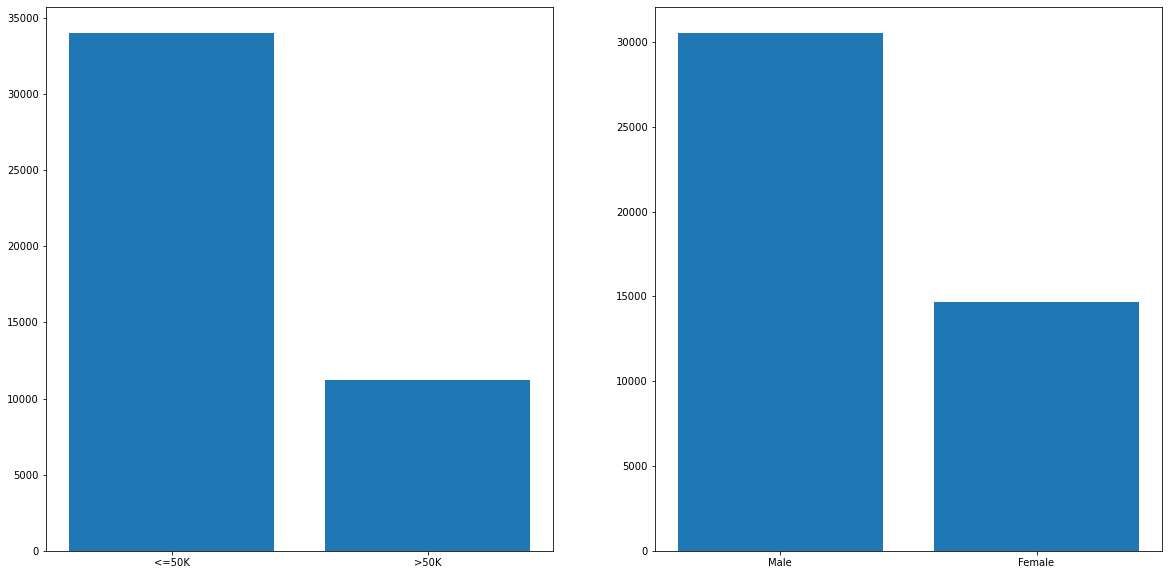

In [123]:
# plotting categorical columns

#__________________________
plt.rcParams['figure.figsize'] = (20, 10)
#plt.setp(axs.xaxis.get_majorticklabels(), rotation=45)

fig, axs = plt.subplots(1, 2)

axs[0].bar(df_class.Name, df_class.Count)
axs[1].bar(df_sex.Name, df_sex.Count)
#__________________________

'''
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 3)

# Specify the features of interest
num_features = ['workclass', 'capital-gain', 'capital-loss', 'hours-per-week']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)




#fig, axs = plt.subplots(2, 3, figsize=(10, 5), sharey=True)

#axs[0].bar(df_workclass.Name, df_workclass.Count)
#axs[1].bar(df_education.Name, df_education.Count)
#axs[2].bar(df_marital_status.Name, df_marital_status.Count)
#fig.suptitle('Categorical Plotting')
'''

In [125]:
# changing column types to category

df["workclass"] = df["workclass"].astype('category')
df["education"] = df["education"].astype('category')
df["marital-status"] = df["marital-status"].astype('category')
df["occupation"] = df["occupation"].astype('category')
df["relationship"] = df["relationship"].astype('category')
df["race"] = df["race"].astype('category')
df["sex"] = df["sex"].astype('category')
df["native-country"] = df["native-country"].astype('category')
df["class"] = df["class"].astype('category')

# creating numerical encoding
df["workclass_cat"] = df["workclass"].cat.codes
df["education_cat"] = df["education"].cat.codes
df["marital-status_cat"] = df["marital-status"].cat.codes
df["occupation_cat"] = df["occupation"].cat.codes
df["relationship_cat"] = df["relationship"].cat.codes
df["race_cat"] = df["race"].cat.codes
df["sex_cat"] = df["sex"].cat.codes
df["native-country_cat"] = df["native-country"].cat.codes
df["class_cat"] = df["class"].cat.codes

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,class,workclass_cat,education_cat,marital-status_cat,occupation_cat,relationship_cat,race_cat,sex_cat,native-country_cat,class_cat
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,<=50K,2,1,4,6,3,2,1,38,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,<=50K,2,11,2,4,0,4,1,38,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,>50K,1,7,2,10,0,4,1,38,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,>50K,2,15,2,6,0,2,1,38,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,...,<=50K,2,0,4,7,1,4,1,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,<=50K,2,7,2,12,5,4,0,38,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,>50K,2,11,2,6,0,4,1,38,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,<=50K,2,11,6,0,4,4,0,38,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,<=50K,2,11,4,0,3,4,1,38,0
